In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql

# Paramètres de connexion
user = "root"
password = " "
host = "localhost"      # ou IP du serveur
port = 3306             
database = "sentineldb"

# Créer une connexion
pymysql.install_as_MySQLdb()

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# Charger dans des DataFrames pandas
df_brokers = pd.read_sql("SELECT * FROM brokers", engine)
df_importers = pd.read_sql("SELECT * FROM importers", engine)
df_declaration_risk_features = pd.read_sql("SELECT * FROM declaration_risk_features", engine)
df_item_risk_features = pd.read_sql("SELECT * FROM item_risk_features", engine)

# Sauvegarder chaque DataFrame en CSV
df_brokers.to_csv("brokers.csv", sep=";", index=False)   # index=False pour ne pas écrire la colonne d'index
df_importers.to_csv("importers.csv", sep=";", index=False)
df_declaration_risk_features.to_csv("declaration_risk_features.csv",sep=";", index=False)
df_item_risk_features.to_csv("item_risk_features.csv",sep=";", index=False)

# Aperçu des données
print("==== brokers ====")
print(df_brokers.head(), "\n")

print("==== importers ====")
print(df_importers.head(), "\n")

print("==== declaration_risk_features ====")
print(df_declaration_risk_features.head(), "\n")

print("==== item_risk_features ====")
print(df_item_risk_features.head(), "\n")


KeyboardInterrupt: 

In [ ]:
import pandas as pd
brokers = pd.read_csv("brokers.csv" , delimiter = ";", encoding = "latin1")
#brokers = brokers[["dec_cod", "name", "FIRST_OP_DAT", "LAST_OP_DAT","DECL_FREQ_LAST_3MTH","AVG_FOB","AVG_TAX","AVG_FOB_3MTH", "AVG_TAX", "DECL_FREQ"]]
brokers = brokers[["dec_cod", "name", "FIRST_OP_DAT", "LAST_OP_DAT","AVG_FOB","AVG_TAX", "AVG_TAX", "DECL_FREQ"]]
brokers.head()

,dec_cod,name,FIRST_OP_DAT,LAST_OP_DAT,AVG_FOB,AVG_TAX,AVG_TAX,DECL_FREQ
0,000-DOC,Declarant occasionnel,2005-04-01,2015-09-16,47046.47,16472992.58,16472992.58,692.0
1,001-11AN,PRESIDENCE DE LA REPUBLIQUE,2008-09-16,2008-09-18,15079.93,10299283.03,10299283.03,34.0
2,001-21TO,PRESIDENCE DE LA REPUBLIQUE,2007-12-27,2009-03-10,162695.31,84173966.38,84173966.38,47.0
3,001-CAD,STAM,2005-05-10,2011-01-13,35866.68,13020838.06,13020838.06,127.0
4,001-DAD-21TO,PRESIDENCE DE LA REPUBLIQUE,2007-12-19,2007-12-19,520608.00,0.00,0.00,1.0


In [ ]:
declaration_risk = pd.read_csv("declaration_risk_features.csv", delimiter =";" ,encoding = "latin1")
#declaration_risk = declaration_risk[["instanceid","nif_imp","dec_cod","country_origin","country_destination","item_count","hs_code_diversity", "declaration_date","is_physically_inspected"]]
declaration_risk = declaration_risk[["instanceid","nif_imp","dec_cod","item_count","hs_code_diversity", "declaration_date","is_physically_inspected"]]
declaration_risk

Valeurs uniques item_risk: [3, 15, 16, 26, 27, 29, 31, 32, 36, 37]


In [ ]:
importers = pd.read_csv("importers.csv", delimiter = ";", encoding="latin1")
#importers = importers[["nif","name","FIRST_OP_DAT", "LAST_OP_DAT","DECL_FREQ_LAST_3MTH","AVG_FOB", "AVG_TAX", "AVG_FOB_3MTH","AVG_TAX_3MTH", "DECL_FREQ"]]
importers = importers[["nif","name","FIRST_OP_DAT", "LAST_OP_DAT","AVG_FOB", "AVG_TAX", "AVG_FOB_3MTH","AVG_TAX_3MTH", "DECL_FREQ"]]
importers

,nif,name,FIRST_OP_DAT,LAST_OP_DAT,AVG_FOB,AVG_TAX,AVG_FOB_3MTH,AVG_TAX_3MTH,DECL_FREQ
0,4002579249,RANAIVO JOSEPH GEORGES ANSELME,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5002854664,CHINLONG SARLU,2020-09-17,2023-04-25,1467.86,3106251.25,NaN,NaN,4.0
2,0000000102,DROGEMAD SA,2013-05-08,2024-03-27,20253.10,1220150.23,NaN,NaN,301.0
3,0000000114,NUMEN MADAGASCAR,2012-08-27,2025-07-04,12792.62,833.11,3312.85,0.0,82.0
4,0000000127,CAPTELEC,2011-03-03,2025-08-08,21814.84,6045.93,27285.97,0.0,3194.0
...,...,...,...,...,...,...,...,...,...
124516,USAID,USAID,2006-05-22,2025-05-05,38519.27,11855.67,NaN,NaN,67.0
124517,USAID-MADAGASCAR,USAID MADAGASCAR,2005-09-23,2024-04-25,361442.54,20520961.39,NaN,NaN,274.0
124518,VPMTP,Min. Travaux Publics & Transports,2005-04-09,2006-05-22,79965.57,13495574.60,NaN,NaN,5.0
124519,WWF,WORLDWIDE FUND FOR NATURE,2005-12-08,2019-10-30,14541.49,278335.68,NaN,NaN,66.0


In [ ]:
item_risk_features = pd.read_csv("item_risk_features.csv", delimiter=";", encoding="latin1")
#item_risk_features=item_risk_features[["key_itm_nbr", "instanceid", "hs_cod", "item_description","quantity","net_weight_kg", "gross_weight_kg","origin_country", "declared_value_usd", "assessed_value_usd", "value_per_kg"]]
item_risk_features=item_risk_features[["key_itm_nbr", "instanceid", "hs_cod", "net_weight_kg", "gross_weight_kg","origin_country", "assessed_value_usd", "value_per_kg"]]
item_risk_features

C:\Users\fenoa\AppData\Local\Temp\ipykernel_14692\2104630862.py:1: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  item_risk_features = pd.read_csv("item_risk_features.csv", delimiter=";", encoding="latin1")


,key_itm_nbr,instanceid,hs_cod,net_weight_kg,gross_weight_kg,origin_country,assessed_value_usd,value_per_kg
0,1,33095,39072000.0,16800.00,18177.60,NL,40236.00,2.40
1,1,33096,72104900.0,99586.00,100206.00,CN,73425.69,0.74
2,2,33096,72107000.0,32112.00,32472.00,CN,26661.50,0.83
3,1,33097,72142000.0,162600.00,162600.00,TR,100167.04,0.62
4,1,33098,72155000.0,27980.00,27980.00,TR,19899.49,0.71
...,...,...,...,...,...,...,...,...
4317179,1,2948173,48203000.0,1100.00,1164.00,FR,3468.58,3.15
4317180,1,2948189,49019990.0,2400.00,2500.00,FR,11270.74,4.70
4317181,1,2948193,76090000.0,1.05,1.05,FR,111.22,105.93
4317182,1,2948219,98070000.0,4319.60,4319.60,XX,10694.72,2.48


In [ ]:
# brokers + declaration_risk (clé = dec_cod)
df = pd.merge(declaration_risk, brokers, on="dec_cod", how="left")

# Ajouter importers (clé = nif_imp , nif)
df = pd.merge(df, importers, left_on="nif_imp", right_on="nif", how="left")

# Ajouter item_risk (clé = instanceid)
df = pd.merge(df, item_risk_features, on="instanceid", how="right")

df.to_csv("new_data.csv", sep=";", index=False)

In [ ]:
import pandas as pd
data = pd.read_csv("new_data.csv", delimiter=";", encoding="latin1")
data.head()

,instanceid,nif_imp,dec_cod,item_count,hs_code_diversity,declaration_date,is_physically_inspected,name_x,FIRST_OP_DAT_x,LAST_OP_DAT_x,...,AVG_FOB_3MTH,AVG_TAX_3MTH,DECL_FREQ_y,key_itm_nbr,hs_cod,net_weight_kg,gross_weight_kg,origin_country,assessed_value_usd,value_per_kg
0,33095,3000196033,016-CAD,1.0,1.0,2015-01-05,1,STTE DE TRANSIT ET TRANSPORT ETTRAT,2005-04-01,2025-08-11,...,32584.52,4.304669e+07,426.0,1,39072000.0,16800.0,18177.6,NL,40236.00,2.40
1,33096,2000125145,161-TM,2.0,2.0,2015-01-05,0,STE KALFANE FILS,2009-12-28,2024-11-26,...,238264.94,5.150682e+08,431.0,1,72104900.0,99586.0,100206.0,CN,73425.69,0.74
2,33096,2000125145,161-TM,2.0,2.0,2015-01-05,0,STE KALFANE FILS,2009-12-28,2024-11-26,...,238264.94,5.150682e+08,431.0,2,72107000.0,32112.0,32472.0,CN,26661.50,0.83
3,33097,2000125145,161-TM,1.0,1.0,2015-01-05,0,STE KALFANE FILS,2009-12-28,2024-11-26,...,238264.94,5.150682e+08,431.0,1,72142000.0,162600.0,162600.0,TR,100167.04,0.62
4,33098,2000125145,161-TM,1.0,1.0,2015-01-05,0,STE KALFANE FILS,2009-12-28,2024-11-26,...,238264.94,5.150682e+08,431.0,1,72155000.0,27980.0,27980.0,TR,19899.49,0.71


In [3]:
import sys
!{sys.executable} -m pip install shap

KeyboardInterrupt: 

Nombre de cas suspects : 215836
   instanceid     nif_imp      hs_cod  assessed_value_usd  value_per_kg  \
1       33096  2000125145  72104900.0            73425.69          0.74   
2       33096  2000125145  72107000.0            26661.50          0.83   
3       33097  2000125145  72142000.0           100167.04          0.62   
4       33098  2000125145  72155000.0            19899.49          0.71   
5       33099  2000125145  25232900.0            32240.00          0.06   

   fraude_valeur_score  
1            -0.102496  
2            -0.058705  
3            -0.142552  
4            -0.049904  
5            -0.166292  

Explication SHAP pour l'observation 1:


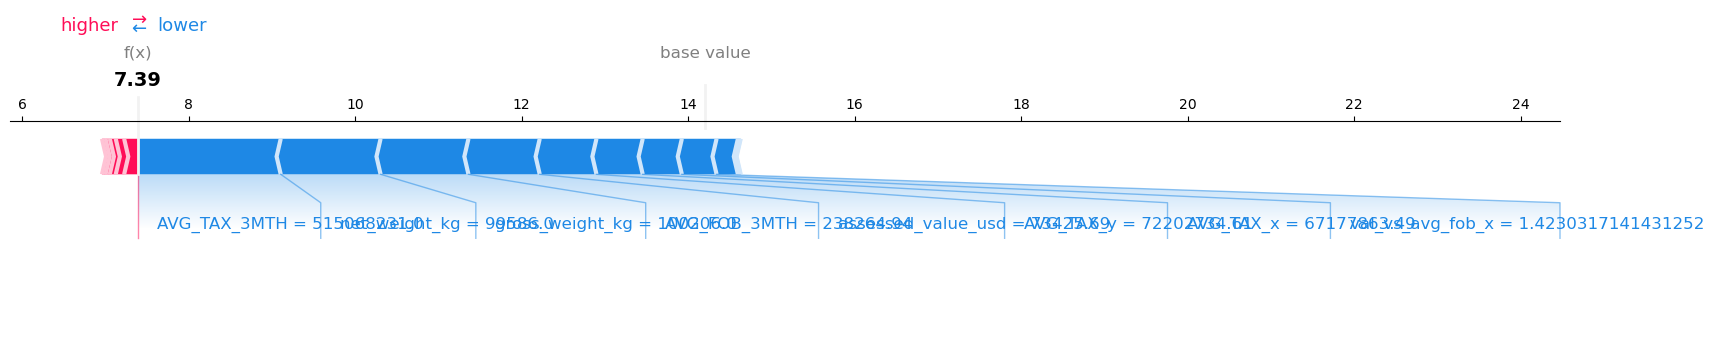


Explication SHAP pour l'observation 2:


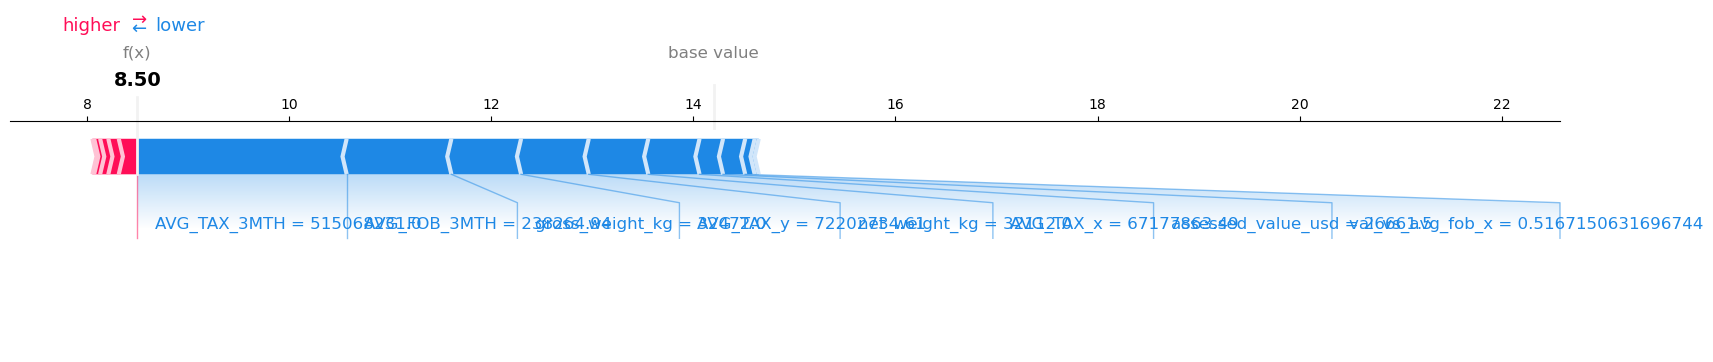


Explication SHAP pour l'observation 3:


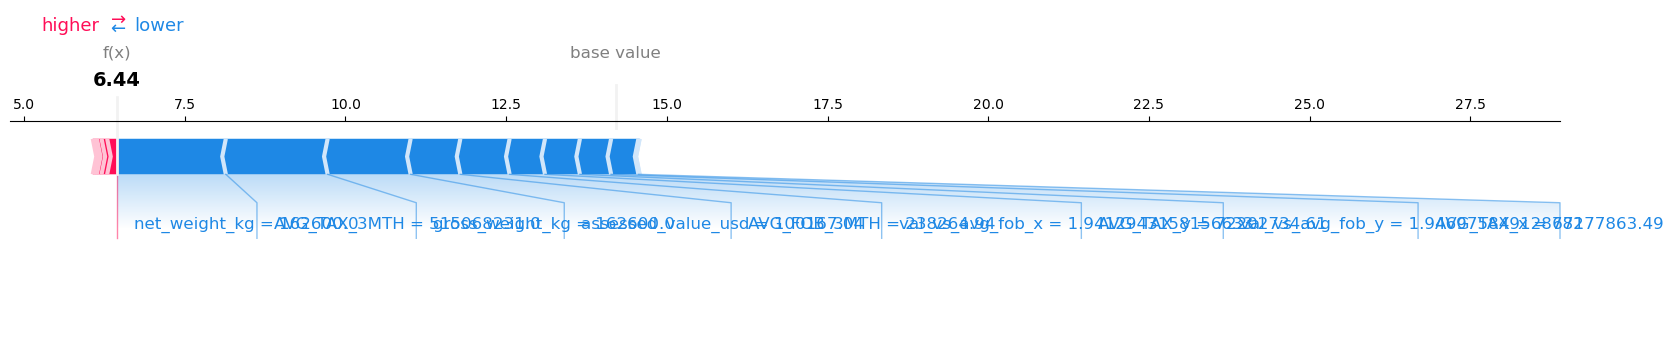


Explication SHAP pour l'observation 4:


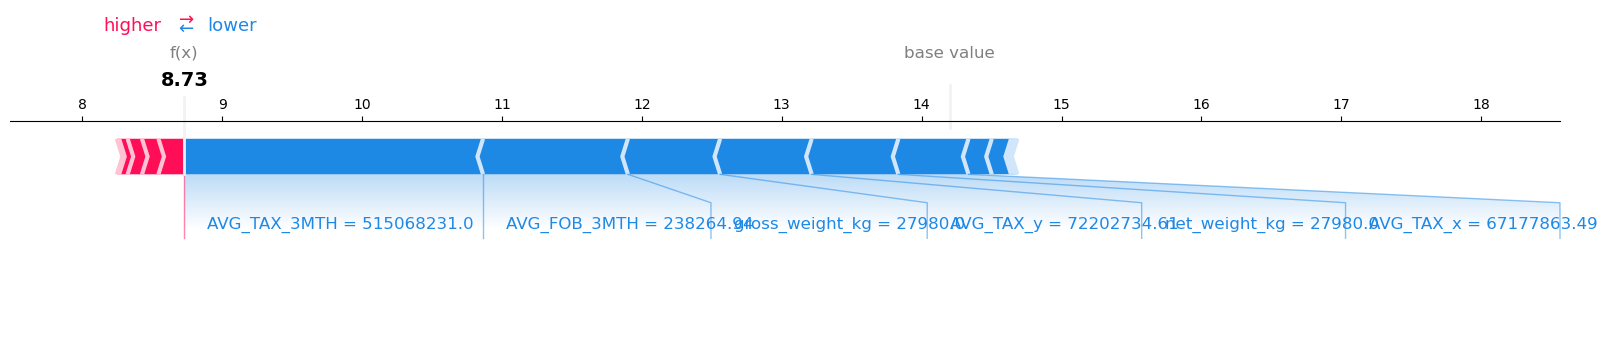


Explication SHAP pour l'observation 5:


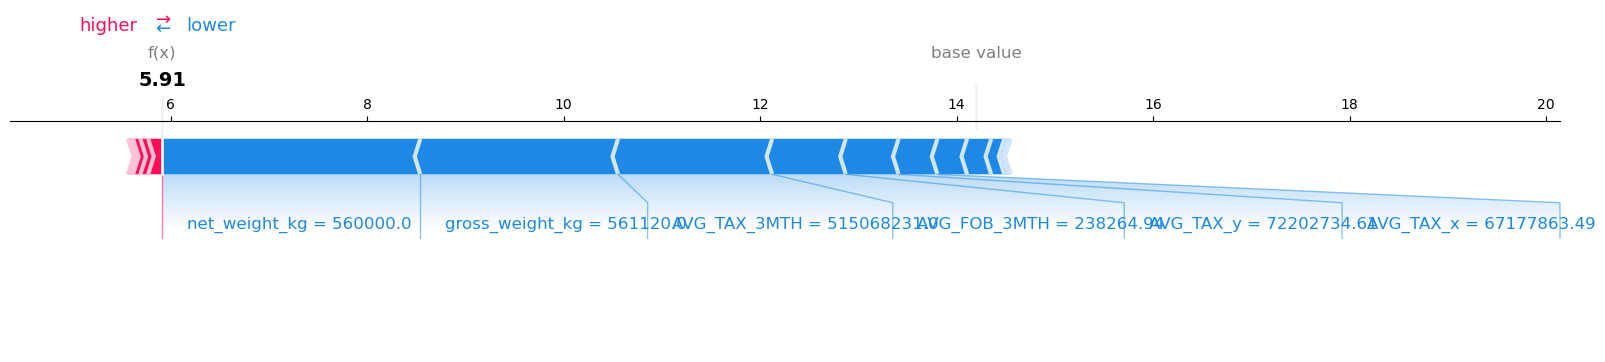

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import shap

# Chargement des données
df = pd.read_csv("new_data.csv", delimiter=";", encoding="latin1")

# Colonnes pertinentes
cols_valeur = [
    "assessed_value_usd",
    "value_per_kg",
    "net_weight_kg",
    "gross_weight_kg",
    "AVG_FOB_x",
    "AVG_FOB_y",
    "AVG_TAX_x",
    "AVG_TAX_y",
    "AVG_FOB_3MTH",
    "AVG_TAX_3MTH",
    "DECL_FREQ_x",
    "DECL_FREQ_y"
]
df_valeur = df[cols_valeur].copy()

# Feature engineering
df_valeur["val_per_net_weight"] = df["assessed_value_usd"] / (df["net_weight_kg"] + 1e-6)
df_valeur["val_vs_avg_fob_x"]   = df["assessed_value_usd"] / (df["AVG_FOB_x"] + 1e-6)
df_valeur["val_vs_avg_fob_y"]   = df["assessed_value_usd"] / (df["AVG_FOB_y"] + 1e-6)
df_valeur["gross_net_ratio"]    = (df["gross_weight_kg"] + 1e-6) / (df["net_weight_kg"] + 1e-6)

# Nettoyage
df_valeur.replace([np.inf, -np.inf], np.nan, inplace=True)
df_valeur.fillna(0, inplace=True)

# Pipeline : Standardisation + Isolation Forest
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("isoforest", IsolationForest(
        n_estimators=200,
        contamination=0.05,
        random_state=42
    ))
])

pipeline.fit(df_valeur)

# Prédiction
df["fraude_valeur_pred"] = pipeline.predict(df_valeur)
X_scaled = pipeline.named_steps["scaler"].transform(df_valeur)
df["fraude_valeur_score"] = pipeline.named_steps["isoforest"].decision_function(X_scaled)

# Sélection des cas suspects
suspects = df[df["fraude_valeur_pred"] == -1].copy()

print("Nombre de cas suspects :", suspects.shape[0])
print(suspects[[
    "instanceid", "nif_imp", "hs_cod", 
    "assessed_value_usd", "value_per_kg", 
    "fraude_valeur_score"
]].head(5))

# Explication avec SHAP (sur les 5 premiers suspects)
explainer = shap.TreeExplainer(pipeline.named_steps["isoforest"])
shap_values = explainer.shap_values(X_scaled)

top5_indices = suspects.head(5).index

for idx in top5_indices:
    print(f"\nExplication SHAP pour l'observation {idx}:")
    shap.force_plot(
        explainer.expected_value,
        shap_values[idx],
        df_valeur.iloc[idx],
        matplotlib=True  # permet un rendu en image statique
    )


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import shap

# Charger les données
df = pd.read_csv("new_data.csv")

# Sélection des features
features = [
    # Valeur
    "assessed_value_usd",
    "value_per_kg",
    "AVG_FOB_x", "AVG_TAX_x",
    "AVG_FOB_y", "AVG_TAX_y",
    "AVG_FOB_3MTH", "AVG_TAX_3MTH",
    
    # Quantité
    "item_count",
    "net_weight_kg",
    "gross_weight_kg",
    
    # Origine
    "origin_country",
    
    # Fréquences
    "DECL_FREQ_x",
    "DECL_FREQ_y"
]

X = df[features].copy()

# Encoder les colonnes catégorielles
for col in X.select_dtypes(include=["object"]).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Isolation Forest
iso = IsolationForest(
    n_estimators=300,
    contamination=0.05,
    random_state=42
)
df["anomaly_score"] = iso.fit_predict(X)

# SHAP pour interprétation
explainer = shap.TreeExplainer(iso)
shap_values = explainer.shap_values(X)

# Résumé global des features
shap.summary_plot(shap_values, X, plot_type="bar")

# explication d'une déclaration suspecte
suspect_idx = df[df["anomaly_score"] == -1].index[0]  # première anomalie détectée
suspect = X.iloc[[suspect_idx]]

shap.force_plot(explainer.expected_value, 
                shap_values[suspect_idx], 
                suspect)
